<a href="https://colab.research.google.com/github/anwar-opu/Email_Or_SMS_Spam_Classifier/blob/main/sms_Spam_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [2]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset


Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown


In [3]:
!unzip sms-spam-collection-dataset.zip


Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("spam.csv", encoding='latin-1')

# Display the first few rows
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# total shape
df.shape

(5572, 5)

In [6]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Model Evaluation
# 6. Improvement
# 7. Website
# 8. Deployment

# 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# Drop last Three column:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
4289,ham,"For you information, IKEA is spelled with all ..."
896,ham,Hope you are having a good week. Just checking in
124,ham,ÌÏ predict wat time Ì_'ll finish buying?
3072,ham,Somebody should go to andros and steal ice
1401,ham,Kaiez... Enjoy ur tuition... Gee... Thk e seco...


In [10]:
# rename col name
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4251,ham,"Send ur birthdate with month and year, I will ..."
4034,spam,YOU ARE CHOSEN TO RECEIVE A å£350 AWARD! Pls c...
1650,ham,I dont have any of your file in my bag..i was ...
431,ham,Does she usually take fifteen fucking minutes ...
975,ham,Hey no I ad a crap nite was borin without ya 2...


In [11]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [13]:
# ham = 0 and spam = 1 modifiy
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
# missing value
df.isnull().sum()

,0
target,0
text,0


In [16]:
# check value duplicate value
df.duplicated().sum()

np.int64(403)

In [17]:
df[df.duplicated()]

,target,text
102,0,As per your request 'Melle Melle (Oru Minnamin...
153,0,As per your request 'Melle Melle (Oru Minnamin...
206,0,"As I entered my cabin my PA said, '' Happy B'd..."
222,0,"Sorry, I'll call later"
325,0,No calls..messages..missed calls
...,...,...
5524,1,You are awarded a SiPix Digital Camera! call 0...
5535,0,"I know you are thinkin malaria. But relax, chi..."
5539,0,Just sleeping..and surfing
5553,0,Hahaha..use your brain dear


In [18]:
# remove duplicates value
df = df.drop_duplicates(keep='first')

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df.shape

(5169, 2)

# EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df['target'].value_counts()

,count
target,
0,4516
1,653


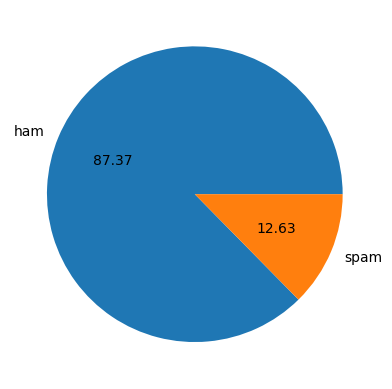

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [24]:
# Data is imbalance

In [25]:
# number of character
# number of word
# number of sentences

In [26]:
import nltk

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
# number of character find in text
df['num_characters'] = df['text'].apply(len)

In [29]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [31]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

In [32]:
df.head()

,target,text,num_characters,word_count
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [33]:
df['sentence_count'] = df['text'].apply(lambda x: len([s for s in x.split('.') if s.strip() != '']))

# Preview the result
df[['text', 'sentence_count']].head()


,text,sentence_count
0,"Go until jurong point, crazy.. Available only ...",3
1,Ok lar... Joking wif u oni...,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,2
3,U dun say so early hor... U c already then say...,2
4,"Nah I don't think he goes to usf, he lives aro...",1


In [34]:
df[['num_characters','word_count','sentence_count']].describe()

,num_characters,word_count,sentence_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.000387
std,58.236293,11.068488,1.426610
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,30.000000


In [35]:
# ham
df[df['target'] == 0][['num_characters','word_count','sentence_count']].describe()

,num_characters,word_count,sentence_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.872896
std,56.358207,11.116240,1.352005
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,30.000000


In [36]:
# spam
df[df['target'] == 1][['num_characters','word_count','sentence_count']].describe()

,num_characters,word_count,sentence_count
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.882083
std,30.137753,5.967672,1.607078
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [37]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

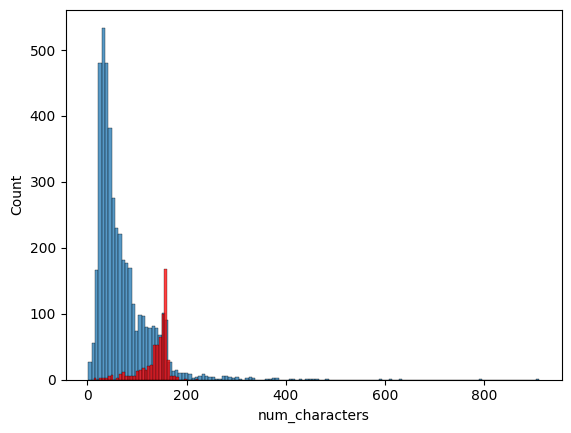

In [38]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='word_count', ylabel='Count'>

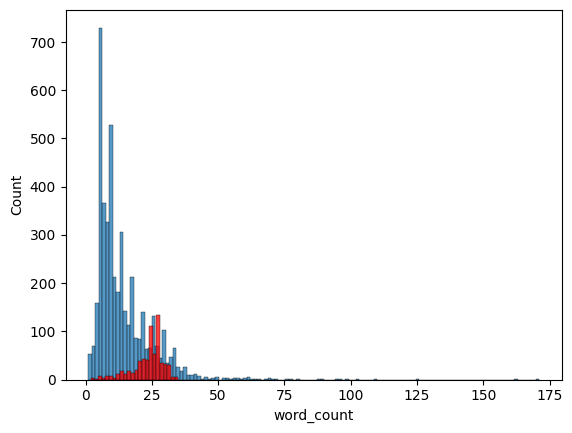

In [39]:
sns.histplot(df[df['target'] == 0]['word_count'])
sns.histplot(df[df['target'] == 1]['word_count'],color='red')

<Axes: xlabel='sentence_count', ylabel='Count'>

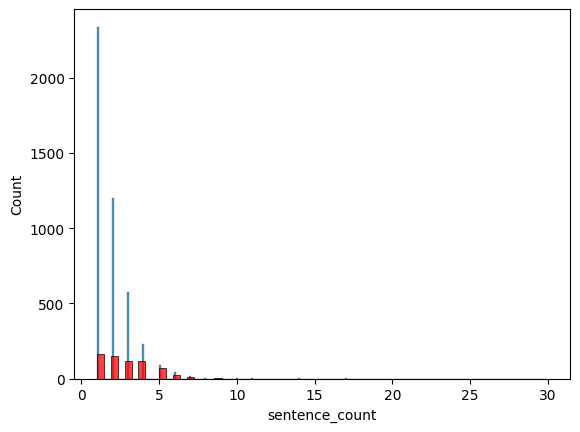

In [40]:
sns.histplot(df[df['target'] == 0]['sentence_count'])
sns.histplot(df[df['target'] == 1]['sentence_count'],color='red')

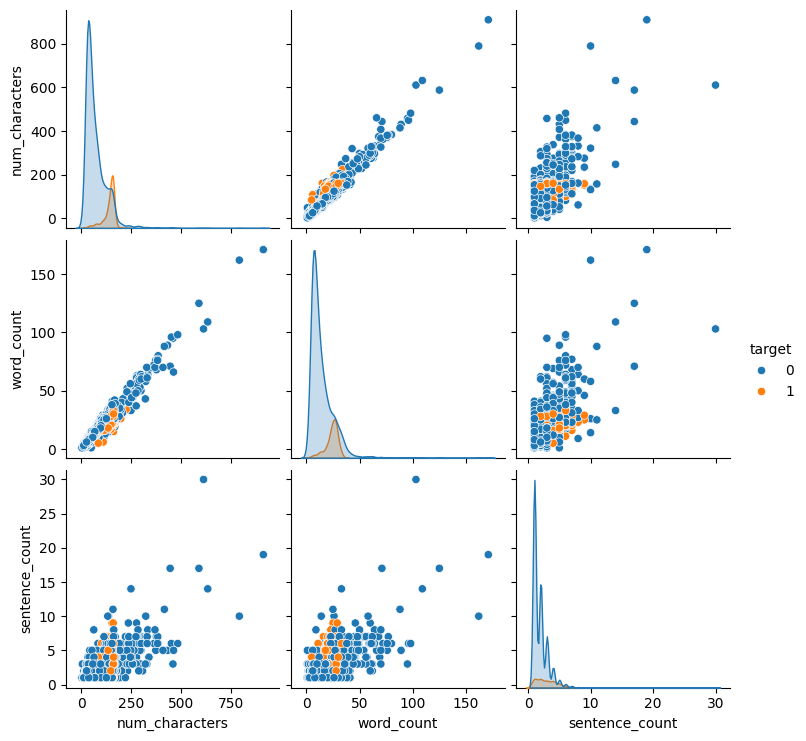

In [41]:
sns.pairplot(df,hue='target')

**Data Preprocessing**

In [42]:
# lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# stemming

In [43]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [44]:
# Stop word
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [45]:
# punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
# stemming
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('running')

'run'

In [47]:
def transform_text(text):
    # convert lower case
    text = text.lower()

    # Tokenization
    text = text.split()  # Tokenize by whitespace

    # Remove special characters -> #,%
    y = []
    for i in text:
      if i.isalnum():
        y.append(i)


    text = y[:]
    y.clear()

    for i in text:
      if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)

    text = y[:]
    y.clear()

    for i in text:
      y.append(ps.stem(i))

    return " ".join(y)


In [48]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong avail bugi n great world la e cine got amor'

In [49]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [50]:
df["transformed_text"] = df['text'].apply(transform_text)

In [51]:
df.head()

,target,text,num_characters,word_count,sentence_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,go jurong avail bugi n great world la e cine g...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok joke wif u
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli u c alreadi
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe live around though


In [52]:
from  wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [53]:
spam_wc =  wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

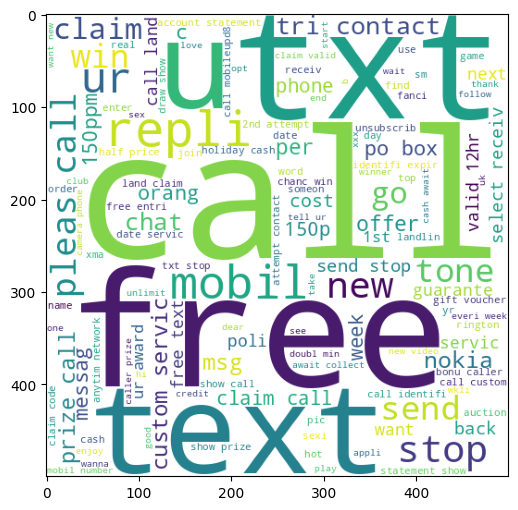

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [55]:
ham_wc =  wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))

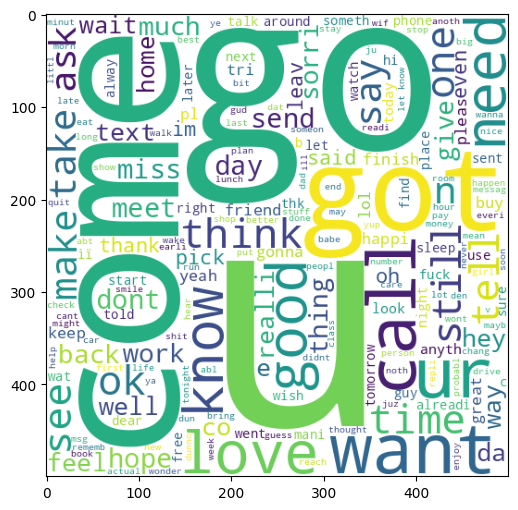

In [56]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [57]:
# top 30 word use in spam
spam_corpus = []
for mgs in df[df['target'] == 1]['transformed_text'].tolist():
  for word in mgs.split():
    spam_corpus.append(word)

In [58]:
len(spam_corpus)

8176

In [59]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 310),
 ('free', 157),
 ('2', 151),
 ('txt', 122),
 ('ur', 119),
 ('text', 112),
 ('mobil', 103),
 ('repli', 100),
 ('u', 96),
 ('claim', 91),
 ('stop', 83),
 ('4', 75),
 ('get', 72),
 ('new', 64),
 ('send', 57),
 ('nokia', 56),
 ('contact', 56),
 ('servic', 55),
 ('prize', 54),
 ('tone', 53),
 ('pleas', 49),
 ('win', 47),
 ('cash', 47),
 ('award', 41),
 ('phone', 40),
 ('per', 39),
 ('tri', 36),
 ('custom', 35),
 ('week', 33),
 ('show', 33)]

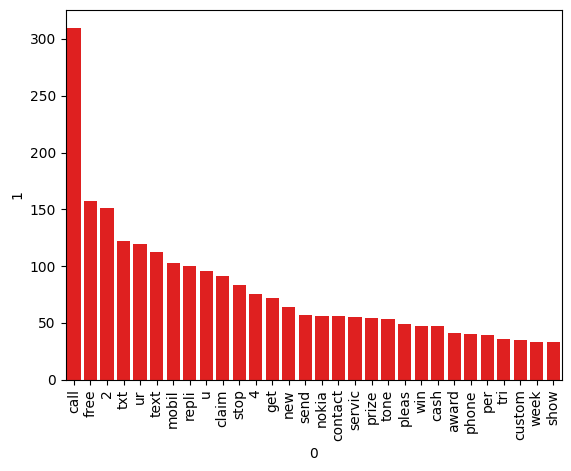

In [60]:
sns.barplot(
    x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1],
    color='red'  # You can change this to 'red', 'green', etc.
)
plt.xticks(rotation='vertical')
plt.show()

In [61]:
# top 30 word use in ham
ham_corpus = []
for mgs in df[df['target'] == 0]['transformed_text'].tolist():
  for word in mgs.split():
    ham_corpus.append(word)

In [62]:
len(ham_corpus)

27382

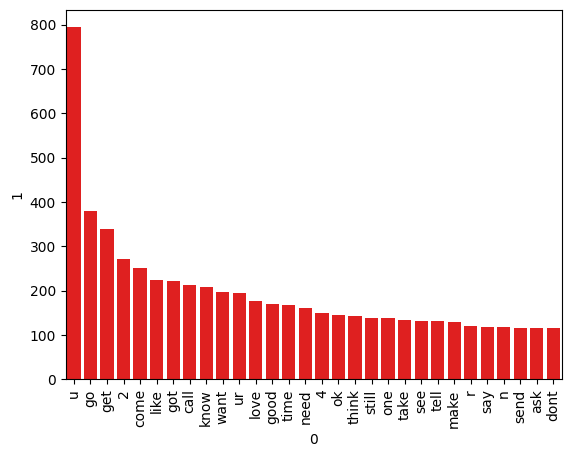

In [63]:
sns.barplot(
    x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
    y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1],
    color='red'  # You can change this to 'red', 'green', etc.
)
plt.xticks(rotation='vertical')
plt.show()

Model Building naive bayes

In [64]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [65]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [66]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
X.shape

(5169, 5643)

In [68]:
y = df['target'].values

In [69]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [73]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.7940038684719536
[[707 189]
 [ 24 114]]
0.37623762376237624


In [74]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9516441005802708
[[896   0]
 [ 50  88]]
1.0


In [75]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9709864603481625
[[892   4]
 [ 26 112]]
0.9655172413793104


In [76]:
# tfidf -> mnb

In [77]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))